# Сборный проект — 2. HR-аналитика

**Описание проекта**

Позади много уроков и заданий, и закрепить свои знания, как обычно, вы сможете в самостоятельном проекте. Это непростой проект, в котором от вас потребуется больше самостоятельности. Этапы работы описаны кратко, и вам понадобится декомпозировать задачи, то есть разделить их на более мелкие. Опирайтесь на знания об этапах анализа данных и машинного обучения из прошлых курсов.
Перейдём к задаче. HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.
Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 
Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 


 **Цель исследования:**

Построить две модели, первая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
вторая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.


**Ход исследования**

Для первой задачи данные будут получены из:
 - Тренировочная выборка:
    `train_job_satisfaction_rate.csv`
 - Входные признаки тестовой выборки:
    `test_features.csv`
 - Целевой признак тестовой выборки:
    `test_target_job_satisfaction_rate.csv`
    
Для второй задачи данные будуут получены из:
 - Тренировочная выборка:
    `train_quit.csv`
 - Входные признаки тестовой выборки те же, что и в прошлой задаче:
    `test_features.csv`
 - Целевой признак тестовой выборки:
    `test_target_quit.csv`
    

Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, и приступлю к проведению исследовательского и статического анализа. Заключительным этапом послужит разработка ML-моделей, оценка результатов обучения и подвидение итогов.


***Содержание***

**Задача 1**

 - [Загрузка данных](#section1)
 - [Предобработка данных](#section2)
 - [Исследовательский анализ данных](#section3)
 - [Подготовка данных](#section4)
 - [Обучение модели](#section5)
 - [Выводы по задаче 1](#section6)
 
**Задача 2**

 - [Загрузка данных](#section7)
 - [Предобработка данных](#section8)
 - [Исследовательский анализ данных](#section9)
 - [Добавление нового входного признака](#section10)
 - [Подготовка данных](#section11)
 - [Обучение модели](#section12)
 - [Выводы по задаче 2](#section13)




- [Общий вывод](#section14)
 

# Задача 1: предсказание уровня удовлетворённости сотрудника

<a id="section1"></a> 
## Загрузка данных

### Установка модулей и импорт библиотек

In [1]:
!pip install phik -q

In [2]:
!pip install scikit-learn==1.1.3 -q

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns
import math
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.dummy import DummyRegressor

from phik import phik_matrix 
from phik.report import plot_correlation_matrix

#отключение ограничений вывода графиков по высоте
from IPython.display import display, HTML
display(HTML("<style>.output_wrapper, .output {height:auto !important;}</style>"))

#отключение предупреждений
import warnings

warnings.filterwarnings('ignore')

Инициализируем константы, которые будут использованы в проекте

In [4]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

### Загрузка датасетов

In [5]:
train_data = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
X_test = pd.read_csv('/datasets/test_features.csv')
y_test = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

### Обзор датасетов

**Датасет train_job_data**

In [6]:
train_data.head(10)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
5,405448,hr,middle,low,7,no,no,4,30000,0.78
6,857135,sales,sinior,medium,9,no,no,3,56400,0.56
7,400657,purchasing,middle,high,9,no,no,3,52800,0.44
8,198846,hr,junior,low,1,no,no,2,13200,0.14
9,149797,technology,middle,high,6,no,no,3,54000,0.47


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


**Датасет test_features_data**

In [8]:
X_test.head(10)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


In [9]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


**Датасет test_target_data**

In [10]:
y_test.head(10)

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
5,817219,0.76
6,269033,0.64
7,962356,0.38
8,649052,0.14
9,532834,0.59


In [11]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


### Промежуточный вывод

На стандии загрузки и обзора данных, можно сделать следующие заключения:
 - названия столбцов соответсвуют стандарту
 - типы данных соответсвуют данным
 - в датасетах `train_job_data` и `test_features_data` присутсвуют пропущенные значения

<a id="section2"></a> 
##  Предобработка данных

### Обработка пропущеннных значений

**Проверка столбца `dept`**

In [12]:
train_data[train_data['dept'].isna()]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1526,694746,NaN,junior,medium,5,no,no,4,21600,0.62
1630,814624,NaN,junior,medium,3,no,no,4,24000,0.88
1633,475114,NaN,junior,high,4,no,no,4,31200,0.63
2781,497243,NaN,junior,medium,1,no,no,3,26400,0.28
2975,168668,NaN,junior,low,3,no,no,4,18000,0.88
3866,641150,NaN,junior,low,3,no,yes,4,12000,0.54


In [13]:
X_test[(X_test['dept'] == ' ') | (X_test['dept'].isna())]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
191,609865,NaN,junior,medium,1,no,no,1,20400
1196,832342,NaN,junior,medium,1,no,no,4,28800
1699,822186,,middle,medium,3,no,no,4,38400


**Проверка столбца `level`**

In [14]:
train_data[train_data['level'].isna()]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1209,631073,sales,NaN,medium,1,no,no,4,27600,0.66
1469,416327,sales,NaN,low,1,no,no,5,18000,0.73
1745,135043,sales,NaN,medium,1,no,no,3,26400,0.30
2522,998838,sales,NaN,medium,1,no,no,5,27600,0.71


In [15]:
X_test[X_test['level'].isna()]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
312,471990,sales,NaN,low,1,no,no,3,12000


**Проверка столбца `workload`**

In [16]:
X_test[X_test['workload'] == ' ']

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
15,590867,marketing,junior,,4,no,no,4,28800


В столбцах `dept` — отдел, в котором работает сотрудник, `level` — уровень занимаемой должности, обнаружены пропущенные значения, заполним их на этапе работы с пайплайном.

### Обработка дубликатов 

**Явные дубликаты**

In [17]:
print(train_data.duplicated().sum())
print(X_test.duplicated().sum())
print(y_test.duplicated().sum())

0
0
0


**Неявные дубликаты**

In [18]:
train_job_data_cols = train_data.select_dtypes(include=['object'])
test_features_data_cols = X_test.select_dtypes(include=['object'])

all_datas = [train_data, X_test]

all_cols = [train_job_data_cols, test_features_data_cols]

i=0

for cols in all_cols:
    for col in cols:
        print(all_datas[i][col].unique())
        
    i+=1
    print()

['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
['junior' 'middle' 'sinior' nan]
['medium' 'high' 'low']
['no' 'yes']
['no' 'yes']

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
['junior' 'middle' 'sinior' nan]
['medium' 'low' 'high' ' ']
['no' 'yes']
['no' 'yes']



Исправим опечатку `sinior` на `senior`

In [19]:
train_data['level'] = train_data['level'].replace('sinior', 'senior')

In [20]:
train_job_data_cols = train_data.select_dtypes(include=['object'])
test_features_data_cols = X_test.select_dtypes(include=['object'])

all_datas = [train_data, X_test]

all_cols = [train_job_data_cols, test_features_data_cols]

i=0

for cols in all_cols:
    for col in cols:
        print(all_datas[i][col].unique())
        
    i+=1
    print()

['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
['junior' 'middle' 'senior' nan]
['medium' 'high' 'low']
['no' 'yes']
['no' 'yes']

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
['junior' 'middle' 'sinior' nan]
['medium' 'low' 'high' ' ']
['no' 'yes']
['no' 'yes']



### Промежуточный вывод

 - строки с пропущенными значениями будут обработаны в пайплайне
 - в данных не обнаружены явные и неявные дубликаты
 - исправлена опечатка
 - пустые значения в столбцах тестового датасета будут обработаны в пайплайне

<a id="section3"></a> 
## Исследовательский анализ данных

### Описание функций

**Основные метрики**

In [21]:
def describe_data(df):
    display(df.describe())

**Графики для количественных признаков**

In [22]:
def plot_distributions(df, numeric_columns, discrete_columns=[]):
    for col in numeric_columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        if col in discrete_columns:
            sns.countplot(x=df[col], ax=axes[0])
            axes[0].set_title(f'Распределение {col}')
        else:
            sns.histplot(df[col], kde=True, ax=axes[0])
            axes[0].set_title(f'Распределение {col}')

        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f'Боксплот {col}')
        
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Частота')
        axes[1].set_xlabel(col)
        axes[1].set_ylabel('Значение')

        plt.show()

**Графики для качественных признаков**

In [23]:
def plot_categorical_distribution(df, categorical_columns):
    for col in categorical_columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Распределение {col}')
        plt.show()

**Проверка на выбросы**

In [24]:
def check_outliers_iqr(df, numeric_columns):
    outliers = {}
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outliers[col] = outliers_count
    print("Количество выбросов по признакам:")
    print(outliers)

### Анализ train_job_satisfaction_rate

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.718500,3.476500,33926.700000,0.533995
std,2.542513,1.008812,14900.703838,0.225327
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.360000
50%,3.000000,4.000000,30000.000000,0.560000
75%,6.000000,4.000000,43200.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


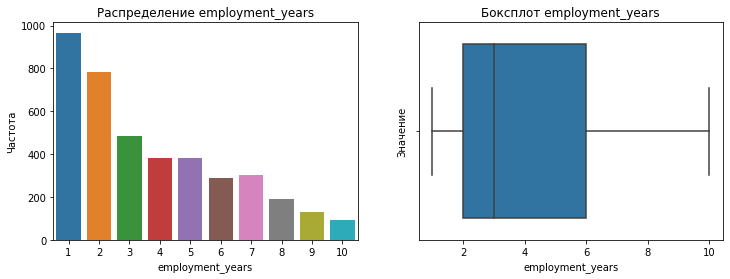

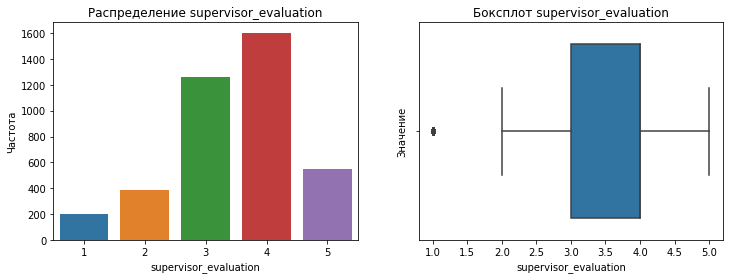

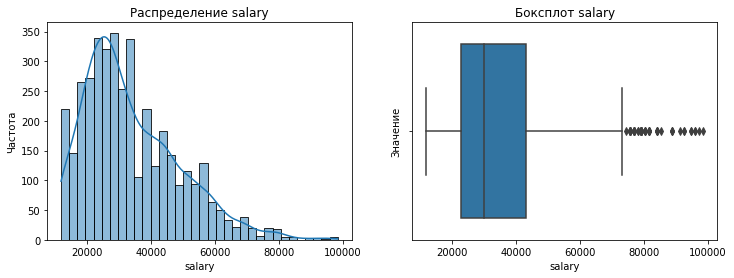

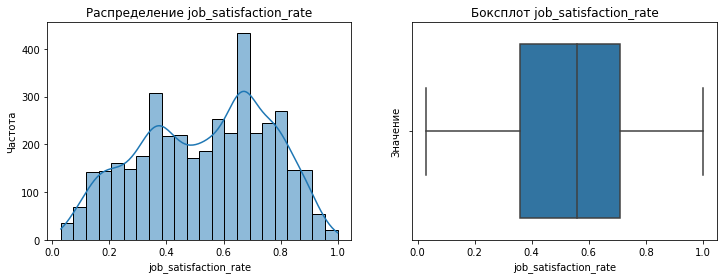

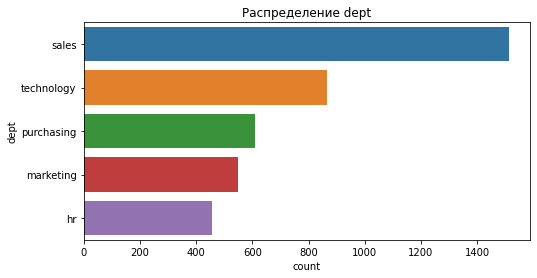

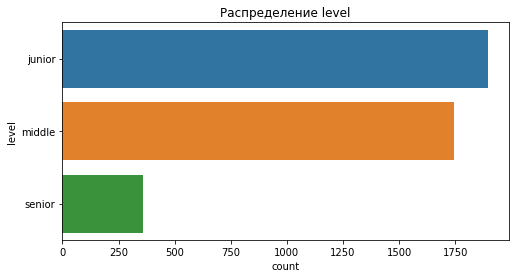

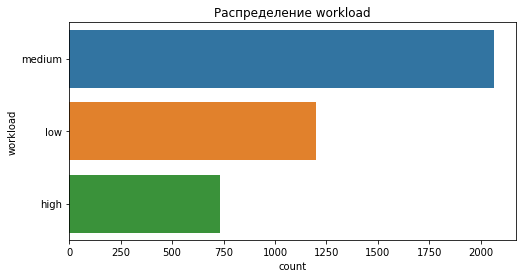

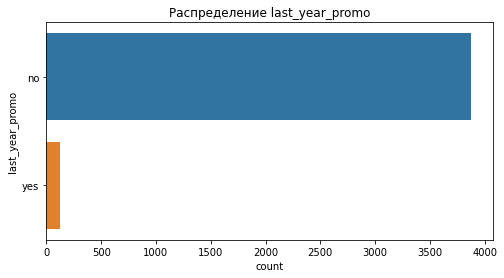

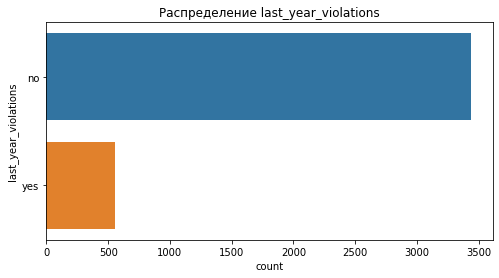

Количество выбросов по признакам:
{'employment_years': 0, 'supervisor_evaluation': 201, 'salary': 60, 'job_satisfaction_rate': 0}


In [25]:
train_data_cat_cols = train_data.select_dtypes(include=['object']).columns.to_list()
train_data_num_cols = train_data.drop(columns='id').select_dtypes(exclude=['object']).columns.to_list()
discrete_features = ['employment_years', 'supervisor_evaluation']

describe_data(train_data.drop(columns='id'))
plot_distributions(train_data, train_data_num_cols, discrete_columns=discrete_features)
plot_categorical_distribution(train_data, train_data_cat_cols)
check_outliers_iqr(train_data, train_data_num_cols)

### Анализ test_features

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


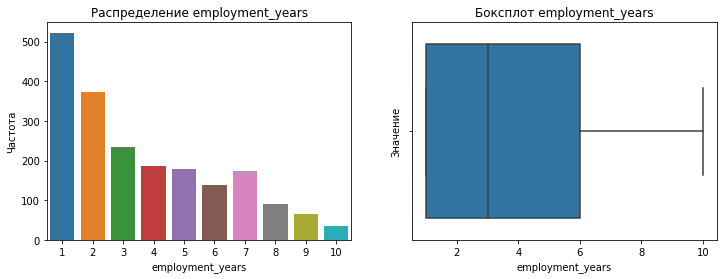

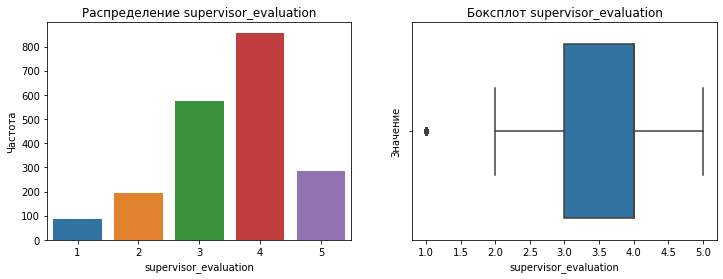

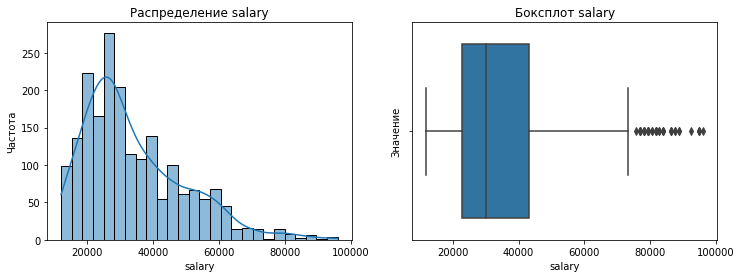

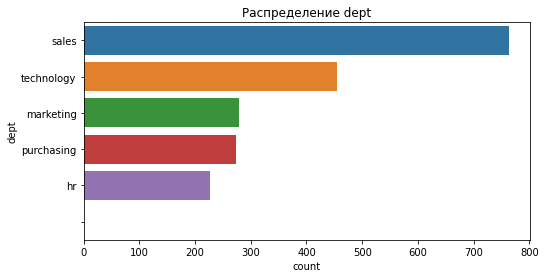

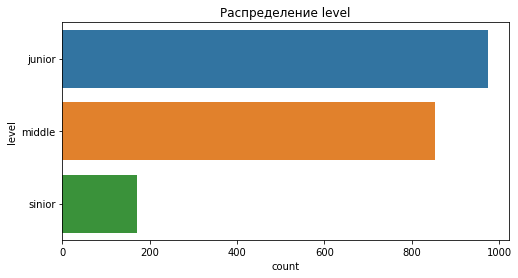

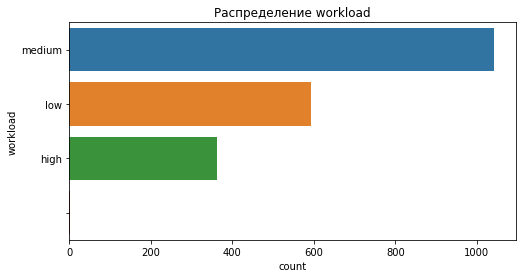

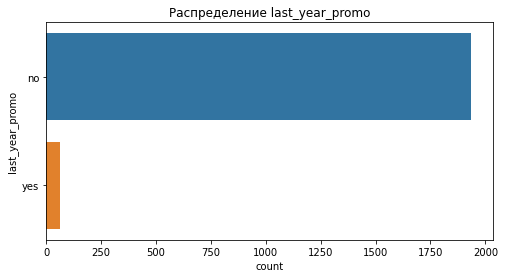

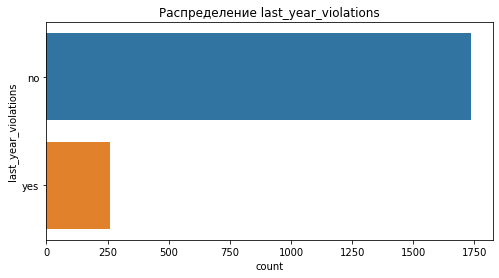

Количество выбросов по признакам:
{'employment_years': 0, 'supervisor_evaluation': 88, 'salary': 39}


In [26]:
X_test_cat_cols = X_test.select_dtypes(include=['object']).columns.to_list()
X_test_num_cols = X_test.drop(columns='id').select_dtypes(exclude=['object']).columns.to_list()
discrete_features = ['employment_years', 'supervisor_evaluation']

describe_data(X_test.drop(columns='id'))
plot_distributions(X_test, X_test_num_cols, discrete_columns=discrete_features)
plot_categorical_distribution(X_test, X_test_cat_cols)
check_outliers_iqr(X_test, X_test_num_cols)

### Анализ test_target

In [27]:
y_test_num_cols = y_test.drop(columns='id').select_dtypes(exclude=['object']).columns.to_list()

describe_data(y_test.drop(columns='id'))

,job_satisfaction_rate
count,2000.00000
mean,0.54878
std,0.22011
min,0.03000
25%,0.38000
50%,0.58000
75%,0.72000
max,1.00000


### Промежуточный вывод

**Статистические характеристики:**

 - Средний стаж сотрудников составляет 3.72 года в `train_data` и 3.67 года в `X_test`.
 - Средняя оценка супервайзера — 3.48 в тренировочных данных и 3.53 в тестовых.
 - Средняя зарплата — 33 953 в `train_data` и 34 087 в `X_test`.
 - Средний уровень удовлетворенности работой (job_satisfaction_rate) в `train_data` — 0.53, в `X_test` — 0.55.
 

**Выводы:**

 - Распределение количественных признаков в `train_data` и `X_test` схоже, что говорит о хорошей репрезентативности тестовой выборки.
 - Уровень удовлетворенности работой в тестовой выборке немного выше, чем в обучающей, но различие незначительное.
 - В данных присутствуют выбросы, но они вполне реальны, поэтомы не удалены

<a id="section4"></a> 
## Подготовка данных

### Корреляционный анализ

Корреляционный анализ помогает находить связи между переменными, лучше понимать структуру данных и отношения между разными факторами.

In [1]:
data_corr = data_full.drop(columns=['customerID'])

interval_cols = ['MonthlyCharges', 'TotalCharges']

phik_overview = phik_matrix(data_corr, interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Матрица корреляций $\phi_K$',
    fontsize_factor=1.3,
    figsize=(16, 12)
)

NameError: name 'data_full' is not defined

**Факторы, сильно влияющие на удовлетворенность работой (job_satisfaction_rate)**

 - supervisor_evaluation (Оценка руководителя) → **0.76** (самая сильная корреляция! Если начальник высоко оценивает сотрудника, то он более удовлетворен работой)
 
 - last_year_violations (Нарушения в прошлом году) → **0.56** (чем больше нарушений, тем ниже удовлетворенность. Это может быть связано с штрафами, ухудшением отношения начальства или стрессом)
 
 - employment_years (Стаж) → **0.33** ( чем больше лет на работе, тем выше удовлетворенность. Возможно, из-за опыта, стабильности или карьерного роста)
 
**Другие факторы с сильной корреляцией**
 - salary и workload  → 0.79, а также salary и level → 0.72. Это очевидно, так как чем выше должность и нагрузка, тем выше зп

**Самое главное: мультиколлинеарность отсутсвует, утечки целевого признака нет**

### Установка индекса

In [29]:
train_data = train_data.set_index('id')
#проверка на дубликаты
train_data.duplicated().sum()

245

In [30]:
train_data = train_data.drop_duplicates()
train_data.shape

(3755, 9)

### Создание метрики SMAPE

**Создание метрики для оценки обучения модели SMAPE**

In [31]:
def smape(y_true, y_pred):
    return 100 / len(y_true) * np.sum(np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred))/2))

smape_scorer = make_scorer(smape, greater_is_better=False)

### Разделение тренировочного датасета

In [32]:
X_train = train_data.drop(['job_satisfaction_rate'], axis=1)
y_train = train_data['job_satisfaction_rate']

X_train.shape

(3755, 8)

**Отбор признаков по их типу**

In [33]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

### Создание пайплайнов

In [34]:

# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
    )

# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior', 'sinior'],  # Добавлен sinior
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

### Промежуточный вывод

На этапе подготовки данных проведены ключевые шаги:

1. Корреляционный анализ показал, что job_satisfaction_rate сильнее всего связан с:

 - Оценкой руководителя (0.76) – высокая оценка повышает удовлетворенность.
 - Нарушениями в прошлом году (-0.56) – больше нарушений → ниже удовлетворенность.
 - Стажем работы (0.33) – больше опыта → выше удовлетворенность.
 - Важно: Мультиколлинеарность и утечка целевого признака отсутствуют.
 
2. Очистка данных:

 - Удалены дубликаты (245 строк).
 - id установлен как индекс.
 
3. Создана метрика SMAPE для оценки моделей.

4. Разделение данных:

 - Числовые признаки: employment_years, supervisor_evaluation, salary.
 - Категориальные (OHE): dept, last_year_violations, last_year_promo.
 - Порядковые (OE): level, workload.
 
5. Разработаны пайплайны предобработки с One-Hot Encoding, Ordinal Encoding, MinMaxScaler и обработкой пропусков (SimpleImputer).

<a id="section5"></a> 
## Обучение моделей

### Обчение модели

In [35]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])
param_grid = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 15),
        'models__max_features': range(2, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },

    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pipeline(s...
                   param_distributions=[{'models': [DecisionTreeRegressor(max_depth=13,
                                                                          max_features=8,
                                                                          random_state=42)],
                                         'models__max_depth': range(2, 15),
                                         'models__max_features': range(2, 15),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LinearRegression()],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42,
                   scoring=make_scorer(smape, greater_is_better=False))

### Получение результатов обучения

In [36]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_ * -1)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                   

**Получение предсказаний на тестовой выборке**

In [37]:
x_Test_1 = X_test.set_index('id')
y_Test_1 = y_test['job_satisfaction_rate']
y_Pred_1 = randomized_search.best_estimator_.predict(x_Test_1)
print(f'Значение метрики SMAPE на тестовых данных: {smape(y_Test_1, y_Pred_1)}')

Значение метрики SMAPE на тестовых данных: 49.9116917294989


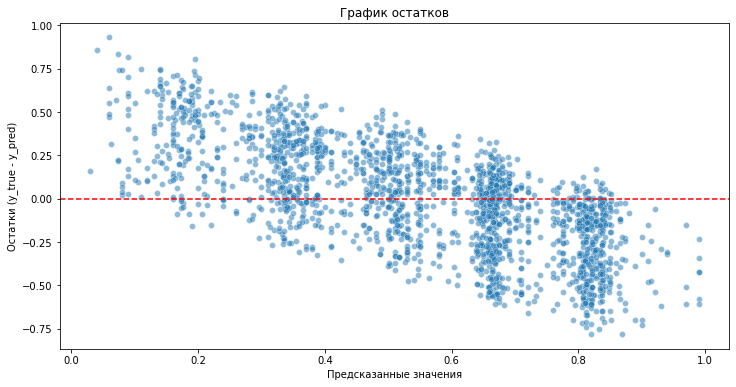

In [38]:
# Вычисление остатков
residuals = y_Test_1 - y_Pred_1

# Построение графика остатков
plt.figure(figsize=(12,6))
sns.scatterplot(x=y_Pred_1, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('График остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки (y_true - y_pred)')
plt.show()

Как видно из резульатов, на тестовой выборке модель показала себя очень плохо! Как вариант, объединить тестовые признаки и тестовый целевой признак в общий датафрейм по id и снова разбить

In [39]:
test_data = X_test.merge(y_test,on='id', how='left')

x_Test_2 = test_data.drop(['id', 'job_satisfaction_rate'], axis=1)
y_Test_2 = test_data['job_satisfaction_rate']

y_Pred_2 = randomized_search.best_estimator_.predict(x_Test_2)
print(f'Значение метрики SMAPE на тестовых данных: {smape(y_Test_2, y_Pred_2)}')

Значение метрики SMAPE на тестовых данных: 14.380135080572849


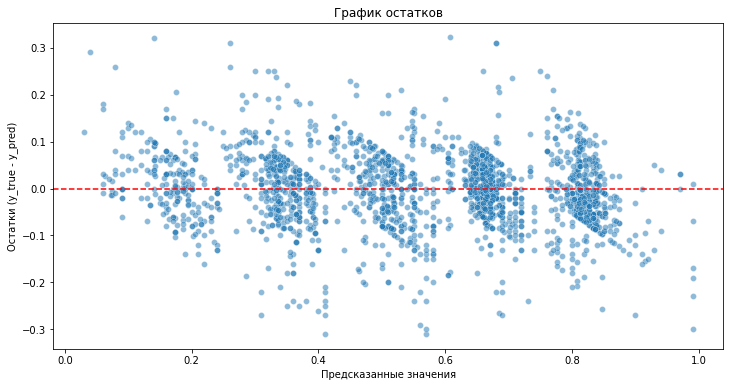

In [40]:
# Вычисление остатков
residuals = y_Test_2 - y_Pred_2

# Построение графика остатков
plt.figure(figsize=(12,6))
sns.scatterplot(x=y_Pred_2, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('График остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки (y_true - y_pred)')
plt.show()

### Проверка лучшей модели на "адекватность"

In [41]:
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train, y_train)

y_dummy_pred = dummy_model.predict(x_Test_2)

smape_dummy = smape(y_Test_2, y_dummy_pred)
print(f'SMAPE DummyRegressor на тесте: {smape_dummy}')

SMAPE DummyRegressor на тесте: 38.26225790202238


Лучшая модель DecisionTreeRegressor показывает лучший результат метрики SMAPE,чем результат константной модели DummyRegressor 14.38 < 38.26. Это говорит нам о том, что мы не зря работали над подбором модели и ее гиперпараметров

### Промежуточный вывод

**По результатам графиков остатков можно сделать несколько выводов:**

1. Первоначальный график остатков: 
На графике остатков для первой модели, где метрика SMAPE была 49.94, видно, что остатки достаточно разбросаны. Это свидетельствует о плохом качестве предсказаний модели, особенно в случае значений предсказаний, близких к 0 или с большим отклонением. 

2. Вторичный график остатков после объединения данных:  
После объединения признаков и целевого признака на основе id и повторной разбивки данных, метрика SMAPE улучшилась до 14.34. На графике остатков для второй модели видно, что остатки более равномерно распределены вокруг нулевой линии, что может указывать на улучшение работы модели.


**По результатам обучения моделей, можно выделить следующие важные моменты:**

 - Лучшая модель:  DecisionTreeRegressor с параметрами:
   - max_depth=13
   - max_features=8
   - random_state=42 
   
 - Метрика SMAPE на тестовых данных: 
 После получения предсказаний на тестовой выборке, для исходной модели результат по метрике SMAPE оказался 49.91, что говорит о значительных ошибках предсказания. Это явно указывает на то, что модель недостаточно точно предсказывает значения на тестовых данных.

 - Преобразование и повторная оценка на объединенных данных: 
 Когда тестовые признаки и целевой признак были объединены в один датафрейм, результат метрики SMAPE улучшился до 14.38, что значительно лучше по сравнению с предыдущим значением. Это демонстрирует, что работа с объединением данных помогла улучшить точность модели.



<a id="section6"></a> 
## Выводы по задаче 1

**Этап предобработки данных и исследовательского анализа**

В столбцах `dept` (отдел) и `level` (уровень должности) были выявлены пропущенные значения, которые были успешно заполнены в процессе работы с пайплайном.

В данных также были обнаружены выбросы в столбцах `supervisor_evaluation` (оценка качества работы сотрудника) и `salary` (ежемесячная зарплата), которые, несмотря на наличие выбросов, оказались реалистичными по своим значениям, поэтому было принято решение не удалять их.

В датасете `X_test` были найдены неожиданные значения в столбцах dept (отдел) и workload (уровень загруженности), которые были заменены на NaN.

Также в столбце `level` (уровень должности) была исправлена опечатка, заменив "senior" на правильное значение.

**Корреляционный анализ**

 - Целевой признак `job_satisfaction_rate` (уровень удовлетворенности сотрудника работой в компании) сильно коррелирует с:

 - `supervisor_evaluation` (оценка качества работы сотрудника) — коэффициент корреляции 0,76,
 - `last_year_violations` (нарушения трудового договора за последний год) — 0,56.
 
Слабо коррелирует с:

 - `employment_years` (длительность работы в компании) — 0,33.


Все выявленные связи логичны и объяснимы, утечек целевого признака не обнаружено.

**Использование пайплайнов**

 - Для поиска наилучшей модели была проведена подготовка данных.
 - Рассматривались модели DecisionTreeRegressor() и LinearRegression().
 - Для DecisionTreeRegressor были подобраны гиперпараметры.
 - Для перебора моделей и гиперпараметров использовался метод RandomizedSearchCV.
 - В качестве метрики оценки использовалась метрика SMAPE.
 
***Результаты:*** Лучшая модель: DecisionTreeRegressor с параметрами:

   - max_depth=13 — ограничивает максимальную глубину дерева (предотвращает переобучение),
   - max_features=8 — максимальное количество признаков, которые могут быть рассмотрены при разделении узлов,
   - random_state=42 — параметр для воспроизводимости результатов.
   
   - Модель "адекватна", так как превосходит константную модель DummyRegressor
   
   
**Метрика**

Метрика на тренировочной выборке: 15.90,

Метрика SMAPE на тестовых данных: 14.38.

Эти параметры помогают контролировать сложность модели и ее способность к обобщению.

## ############################################

# Задача 2: предсказание увольнения сотрудника из компании

<a id="section7"></a> 
## Загрузка данных

### Загрузка датасетов

In [42]:
train_data_2 = pd.read_csv('/datasets/train_quit.csv')
X_test_2 = X_test.copy(deep=True)# так как входные признаки тестовой выборки те же, скопируем датасет
y_test_2 = pd.read_csv('/datasets/test_target_quit.csv')

### Обзор датасетов

**Датасет train_quit**

In [43]:
train_data_2.head(10)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
5,699916,sales,junior,low,1,no,yes,3,18000,yes
6,417070,technology,middle,medium,8,no,no,2,44400,no
7,165489,sales,middle,low,4,no,no,5,19200,no
8,996399,marketing,middle,low,7,no,no,4,25200,no
9,613206,technology,middle,medium,2,no,no,3,45600,yes


In [44]:
train_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


**Датасет test_features**

In [45]:
X_test_2.head(10)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


In [46]:
X_test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


**Датасет test_target_quit**

In [47]:
y_test_2.head(10)

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
5,223063,no
6,810370,no
7,998900,no
8,578329,no
9,648850,no


In [48]:
y_test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


### Промежуточный вывод

 - названия столбцов соответсвуют стандарту
 - типы данных соответсвуют данным
 - в датасетах test_features_data присутсвуют пропущенные значения, заполним в пайплайне

<a id="section8"></a> 
##  Предобработка данных

### Обработка дубликатов

**Явные дубликаты**

In [49]:
train_data_2.duplicated().sum()

0

**Неявные дубликаты**

In [50]:
all_cols = train_data_2.select_dtypes(include=['object'])

for col in all_cols:
    print(train_data_2[col].unique())

['sales' 'purchasing' 'marketing' 'technology' 'hr']
['middle' 'junior' 'sinior']
['high' 'medium' 'low']
['no' 'yes']
['no' 'yes']
['no' 'yes']


In [51]:
train_data_2['level'] = train_data_2['level'].replace('sinior', 'senior')

### Промежуточный вывод

В тренировочном датасете не обнаружено явных и неявных дубликатов. Обработана опечатка

<a id="section9"></a> 
##  Исследовательский анализ данных

Функции будут использованы из задачи №1

### Анализ train_quit

,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000
mean,3.701500,3.474750,33805.800000
std,2.541852,1.004049,15152.415163
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


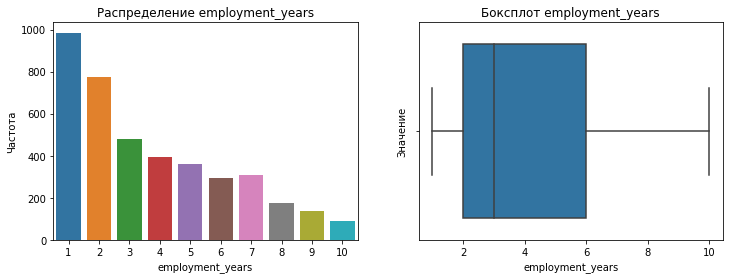

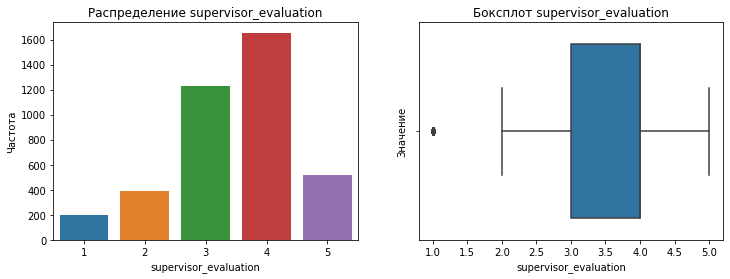

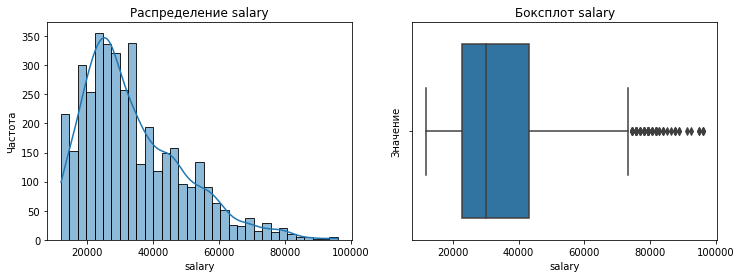

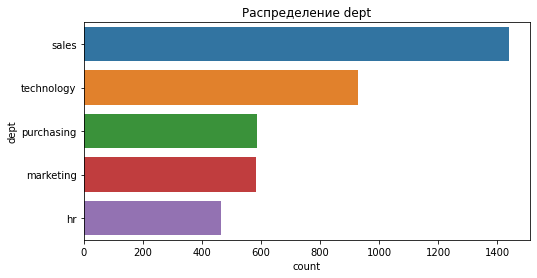

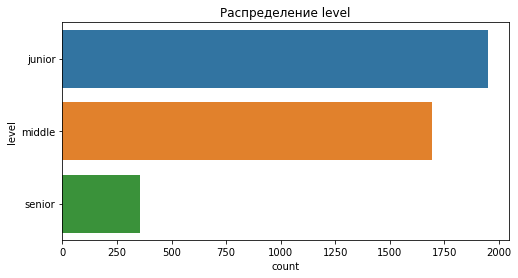

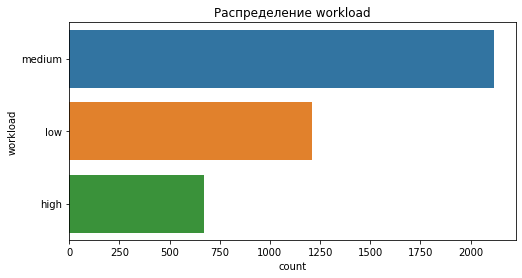

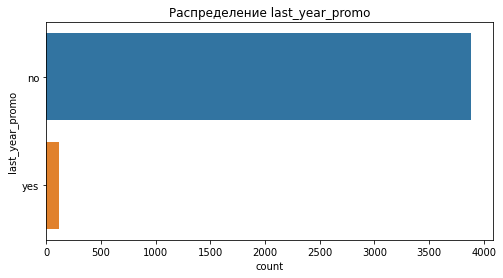

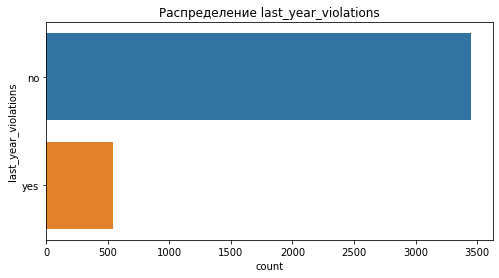

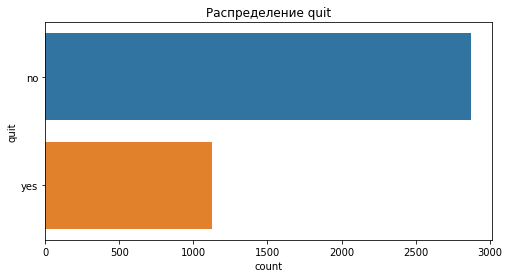

Количество выбросов по признакам:
{'employment_years': 0, 'supervisor_evaluation': 202, 'salary': 78}


In [52]:
train_data_2_cat_cols = train_data_2.select_dtypes(include=['object']).columns.to_list()
train_data_2_num_cols = train_data_2.drop(columns='id').select_dtypes(exclude=['object']).columns.to_list()
discrete_features = ['employment_years', 'supervisor_evaluation']

describe_data(train_data_2.drop(columns='id'))
plot_distributions(train_data_2, train_data_2_num_cols, discrete_columns=discrete_features)
plot_categorical_distribution(train_data_2, train_data_2_cat_cols)
check_outliers_iqr(train_data_2, train_data_2_num_cols)

### Анализ test_target_quit

In [53]:
y_test_2_num_cols = y_test_2.drop(columns='id').select_dtypes(exclude=['object']).columns.to_list()

describe_data(y_test_2.drop(columns='id'))

,quit
count,2000
unique,2
top,no
freq,1436


### Портрет «уволившегося сотрудника»

Выделим сегменты по зарплатам

In [54]:
def salary_level(value):
    if value >= 80000:
            return "от 80к"
    elif value < 80000 and value >= 60000:
            return "60-80к"
    elif value < 60000 and value >= 40000:
            return "40-60к"
    elif value < 40000 and value >= 20000:
            return "20-40к"
    elif value < 20000:
            return "до 20к"    

Добавим новый столбец в тренировочный датасет

In [55]:
train_data_2['salary_level'] = train_data_2['salary'].apply(salary_level)
train_data_2.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,salary_level
0,723290,sales,middle,high,2,no,no,4,54000,no,40-60к
1,814010,sales,junior,medium,2,no,no,4,27600,no,20-40к
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,20-40к
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,20-40к
4,910140,marketing,junior,medium,2,no,no,5,25200,no,20-40к


Визуализируем соотношения уволившихся сотрудников к работающим

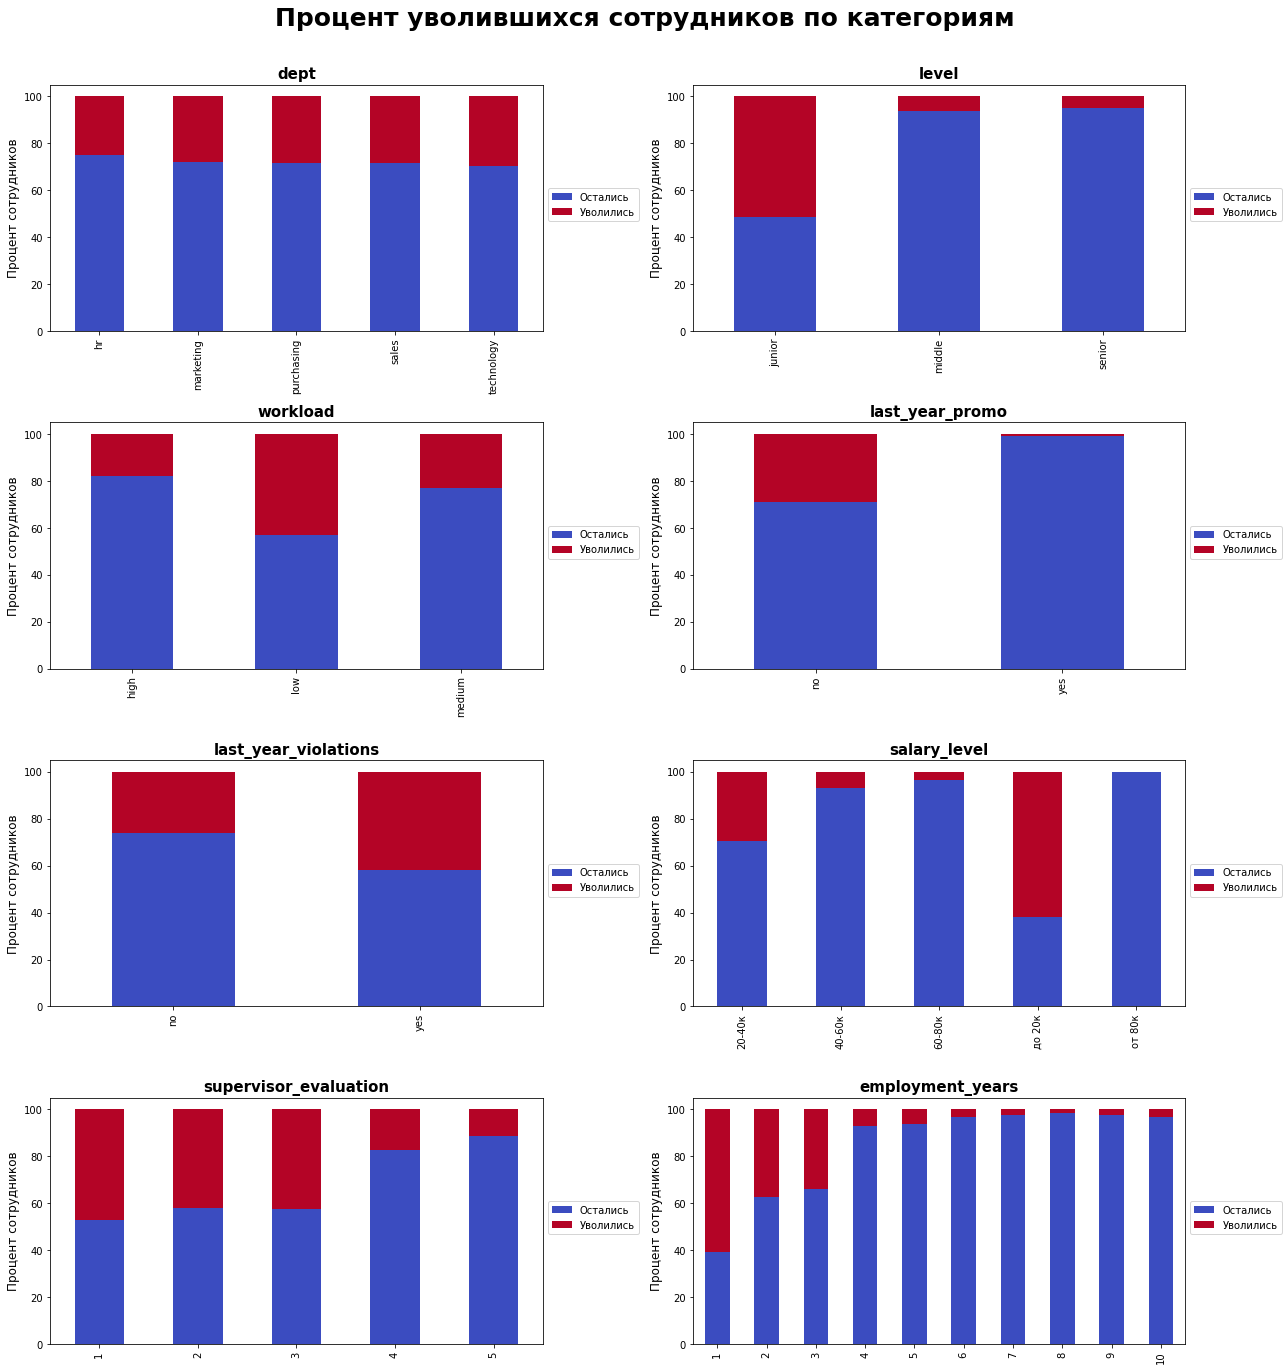

In [56]:
cat_var = ['dept','level','workload','last_year_promo','last_year_violations',
           'salary_level','supervisor_evaluation','employment_years']


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))
fig.suptitle('Процент уволившихся сотрудников по категориям', fontsize=25, fontweight='bold')
axes = axes.flatten()

for idx, col in enumerate(cat_var):
    quit_rates = train_data_2.groupby(col)['quit'].value_counts(normalize=True).unstack() * 100
    quit_rates = quit_rates.rename(columns={'yes': 'Уволились', 'no': 'Остались'})
    
    quit_rates.plot(kind='bar', stacked=True, ax=axes[idx], colormap='coolwarm')
    axes[idx].set_title(f'{col}', fontsize=15, fontweight='bold')
    axes[idx].set_ylabel('Процент сотрудников', fontsize=12)
    axes[idx].set_xlabel('')
    axes[idx].legend(title='Статус')
    axes[idx].legend(bbox_to_anchor=(1, 0.6))
    
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

**На основе представленных диаграмм можно сделать следующие выводы:**

 - Отдел (dept): В некоторых отделах процент увольнений выше, чем в других. Возможно, это связано с условиями труда, уровнем стресса или корпоративной культурой.
 
 - Уровень должности (level): Более низкие должности (junior) имеют более высокий процент увольнений по сравнению с senior-уровнем, что может говорить о меньшей удовлетворенности или высокой текучести кадров среди младших сотрудников.
 
 - Уровень загруженности (workload): У сотрудников с высокой загруженностью доля увольнений выше, что может свидетельствовать о выгорании.
 
 - Прошлогоднее повышение (last_year_promo): Те, кто получил повышение, реже увольняются, что логично — повышение способствует удовлетворенности работой.
 
 - Нарушения трудового договора (last_year_violations): Сотрудники, у которых были нарушения, чаще увольняются, что может указывать на дисциплинарные проблемы или неудовлетворенность условиями работы.
 
 - Уровень зарплаты (salary_level): Более низкий уровень зарплаты коррелирует с более высоким процентом увольнений, тогда как сотрудники с высокой зарплатой остаются дольше.
 
 - Оценка руководителя (supervisor_evaluation): Сотрудники с низкой оценкой чаще увольняются, что может говорить о низкой мотивации или несоответствии ожиданиям.
 
 - Стаж работы (employment_years): В первые несколько лет процент увольнений выше, а затем он снижается. Возможно, это связано с адаптацией новых сотрудников.

### Проверка утверждения

Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверьте это утверждение: визуализируйте и сравните распределения признака `job_satisfaction_rate` для ушедших и оставшихся сотрудников. Используйте данные с обоими целевыми признаками тестовой выборки.

Данные с обоими целевыми признаками тестовой выборки

In [57]:
total_test_data = test_data.merge(y_test_2, on='id', how='left')
total_test_data.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79,no
1,686555,hr,junior,medium,1,no,no,4,30000,0.72,no
2,467458,sales,middle,low,5,no,no,4,19200,0.64,no
3,418655,sales,middle,low,6,no,no,4,19200,0.60,no
4,789145,hr,middle,medium,5,no,no,5,40800,0.75,no


Визуализация

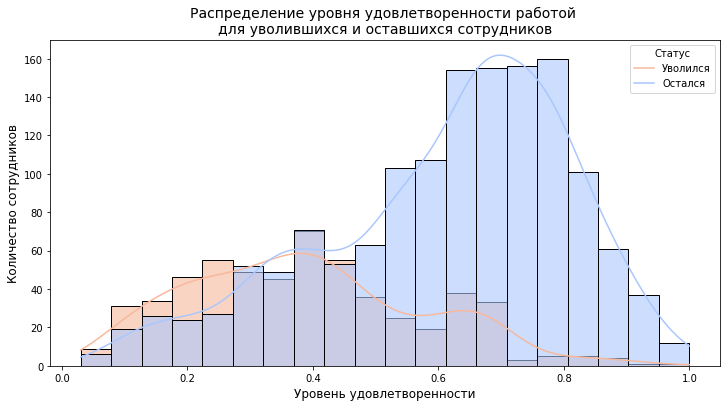

In [58]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=total_test_data, 
    x="job_satisfaction_rate", 
    hue="quit", 
    bins=20, 
    kde=True, 
    palette="coolwarm",
    alpha=0.6
)

plt.title("Распределение уровня удовлетворенности работой \nдля уволившихся и оставшихся сотрудников", fontsize=14)
plt.xlabel("Уровень удовлетворенности", fontsize=12)
plt.ylabel("Количество сотрудников", fontsize=12)
plt.legend(title="Статус", labels=["Уволился", "Остался"])
plt.show()

Как видно из графика, чем выше уровень удовлетворенности работой, тем больше шансов, что сотрудник не уволится и соответственно наоборот

**Формулировка гипотез**
 - H₀ (нулевая гипотеза): Средний уровень удовлетворённости работой не различается у уволившихся и оставшихся сотрудников.
 - H₁ (альтернативная гипотеза): Средний уровень удовлетворённости работой значимо отличается у этих двух групп.

In [59]:
alpha = 0.05

results = st.ttest_ind(total_test_data[total_test_data['quit'] == 'no']['job_satisfaction_rate'],
                       total_test_data[total_test_data['quit'] == 'yes']['job_satisfaction_rate'], 
                       alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 6.155610332585965e-105
Отвергаем нулевую гипотезу


### Промежуточный вывод

**Анализ train_quit**

 - Средний стаж 3.7 года, зарплата 33 805, оценка руководителя 3.47.
 - Выбросы: пристуствуют, но значения реальны, поэтомуу не удалены
 

**Анализ test_target_quit**

71.8% остались, 28.2% уволились.


**Портрет уволившихся**

 - Уходят чаще при низкой зарплате (<40 000), высокой загруженности, низкой оценке руководителя.
 - Junior-сотрудники увольняются чаще, особенно в первые годы работы.
 - Повышение снижает вероятность увольнения, нарушения — наоборот.
 
**Проверка утверждения**

Для проверки утверждения выдвинуты гипотезы и использован `t-тест Стьюдента` → p-value = 6.16e-105.

Отвергаем H₀: Удовлетворённость работой значимо влияет на увольнение.

Вывод: Чем ниже удовлетворённость, тем выше вероятность ухода.

<a id="section10"></a> 
##  Добавление нового входного признака

### Добавление признака в тренировочный датасет

In [60]:
train_data_2['job_satisfaction_rate_pred'] = randomized_search.best_estimator_.predict(train_data_2.drop(columns=['quit', 'id', 'salary_level'], axis=1))
train_data_2.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,salary_level,job_satisfaction_rate_pred
0,723290,sales,middle,high,2,no,no,4,54000,no,40-60к,0.646765
1,814010,sales,junior,medium,2,no,no,4,27600,no,20-40к,0.851538
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,20-40к,0.357500
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,20-40к,0.380000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,20-40к,0.690000


### Добавление признака в тестовый датасет

In [61]:
X_test_2['job_satisfaction_rate_pred'] = randomized_search.best_estimator_.predict(X_test_2.drop('id', axis=1))
X_test_2.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate_pred
0,485046,marketing,junior,medium,2,no,no,5,28800,0.866364
1,686555,hr,junior,medium,1,no,no,4,30000,0.670417
2,467458,sales,middle,low,5,no,no,4,19200,0.654000
3,418655,sales,middle,low,6,no,no,4,19200,0.655000
4,789145,hr,middle,medium,5,no,no,5,40800,0.832000


### Промежуточный вывод

Добавлен столбец с предсказаниями `job_satisfaction_rate` к тренировочным и тестовым данным второй задачи

<a id="section11"></a> 
##  Подготовка данных

### Корреляционный анализ

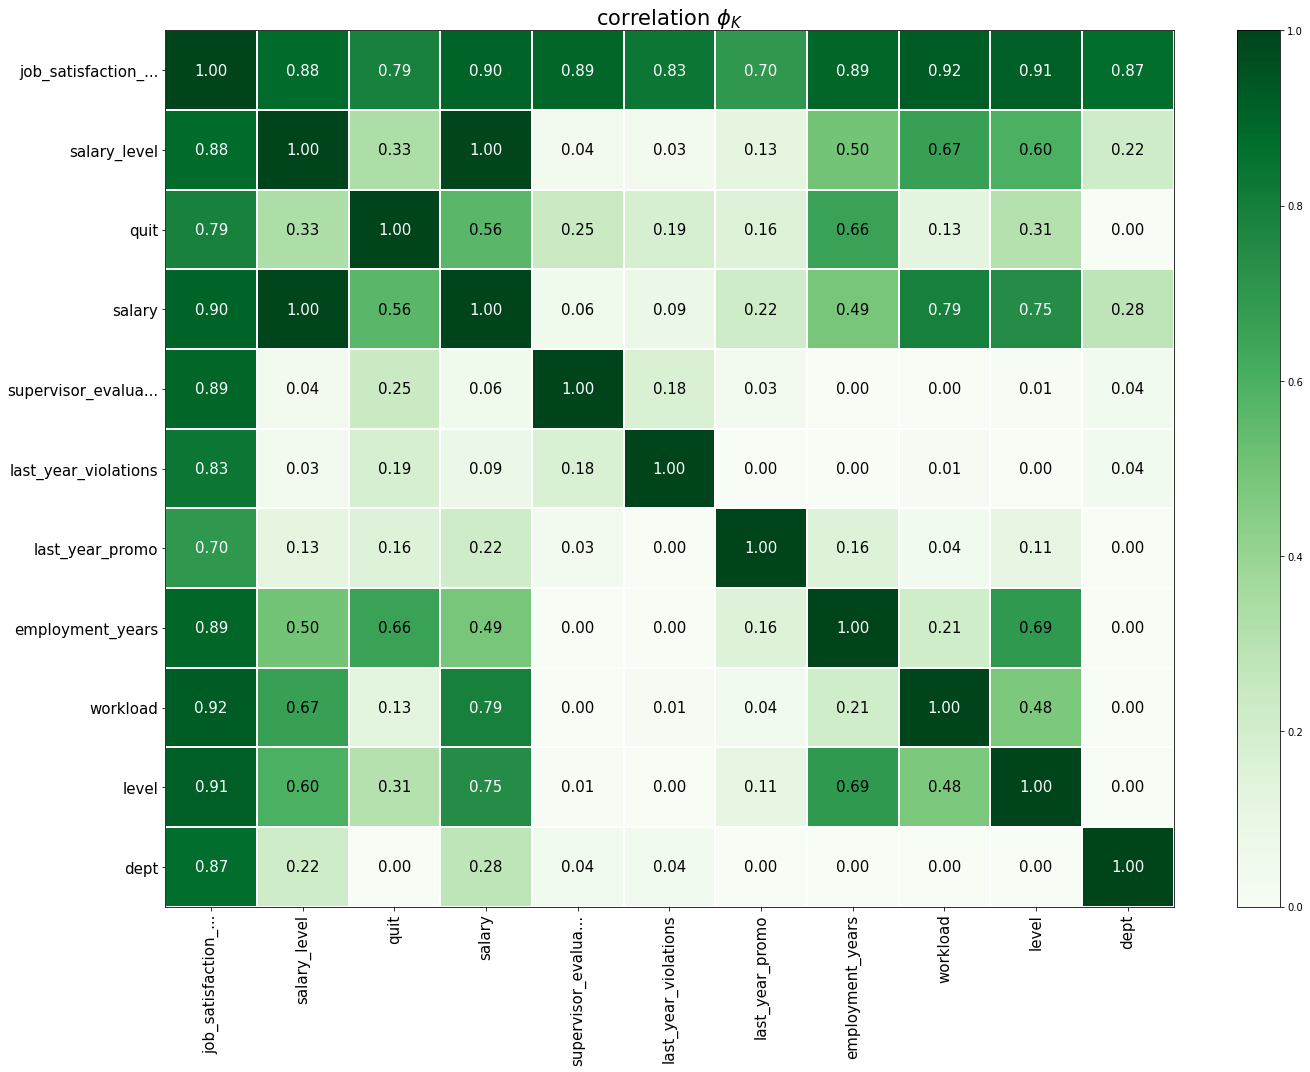

In [62]:
interval_cols = ['salary', 'job_satisfaction_rate']

phik_overview = phik_matrix(train_data_2.drop(columns=['id']), interval_cols=interval_cols) 

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

На графике видна полная корреляция между `salary` и `salary_level`, оно и понятно, ведь мы определяли уровень зарплаты по зарплате, поэтому при обучение модели не будет использовать столбец `salary_level`

<div class="alert alert-warning">
<b>Комментарий 👉</b>

В задаче классификации, когда в данных несколько классов (как у нас: "quit == 1" и "quit == 0"), рекомендовал бы построить хитмап отдельно для каждого класса. Если это делать на данных одновременно для 2х (и более классов - такие могут быть ситуации), то "картинка может быть смазанной"! Очень легко НЕ УВИДЕТЬ взаимосвязи (*только не надо трактовать эти взаимосвязи как **зависимости, которые объясняют** причинно-следственную связь между переменными*) присущие тому или иному классу.

p.s. если ты спросишь: *разве корреляция будет просчитываться, если мы будем ее считать отдельно для каждого класса? Насколько я понял- ты предлагаешь просчитать корреляцию отдельно для "единиц" и "нулей", но если в колонке будет всего одно значение - разве будет хоть что-то с ним коррелировать?*, то будешь абсолютно прав: **если в колонке есть только одно значение (например, все значения равны 1 или все равны 0) для определенного класса, то корреляция будет равна нулю. Это связано с отсутствием вариации в данных**.

Но я выше не про расчет коэффициентов говорю, а про визуальный анализ того, какие признаки оказывают влияние на каждый из классов: "сотрудник уволиться" VS. "сотрудник не уволиться".

Проанализировав отдельные хитмапы, ты можешь выделить те признаки, которые оказывают влияние внутри каждого из классов таргета. Это может помочь в понимании важности определенных характеристик для принятия решения моделью.
</div>


**Отдельно строим корреляцию для уволившихся (quit == 1)**

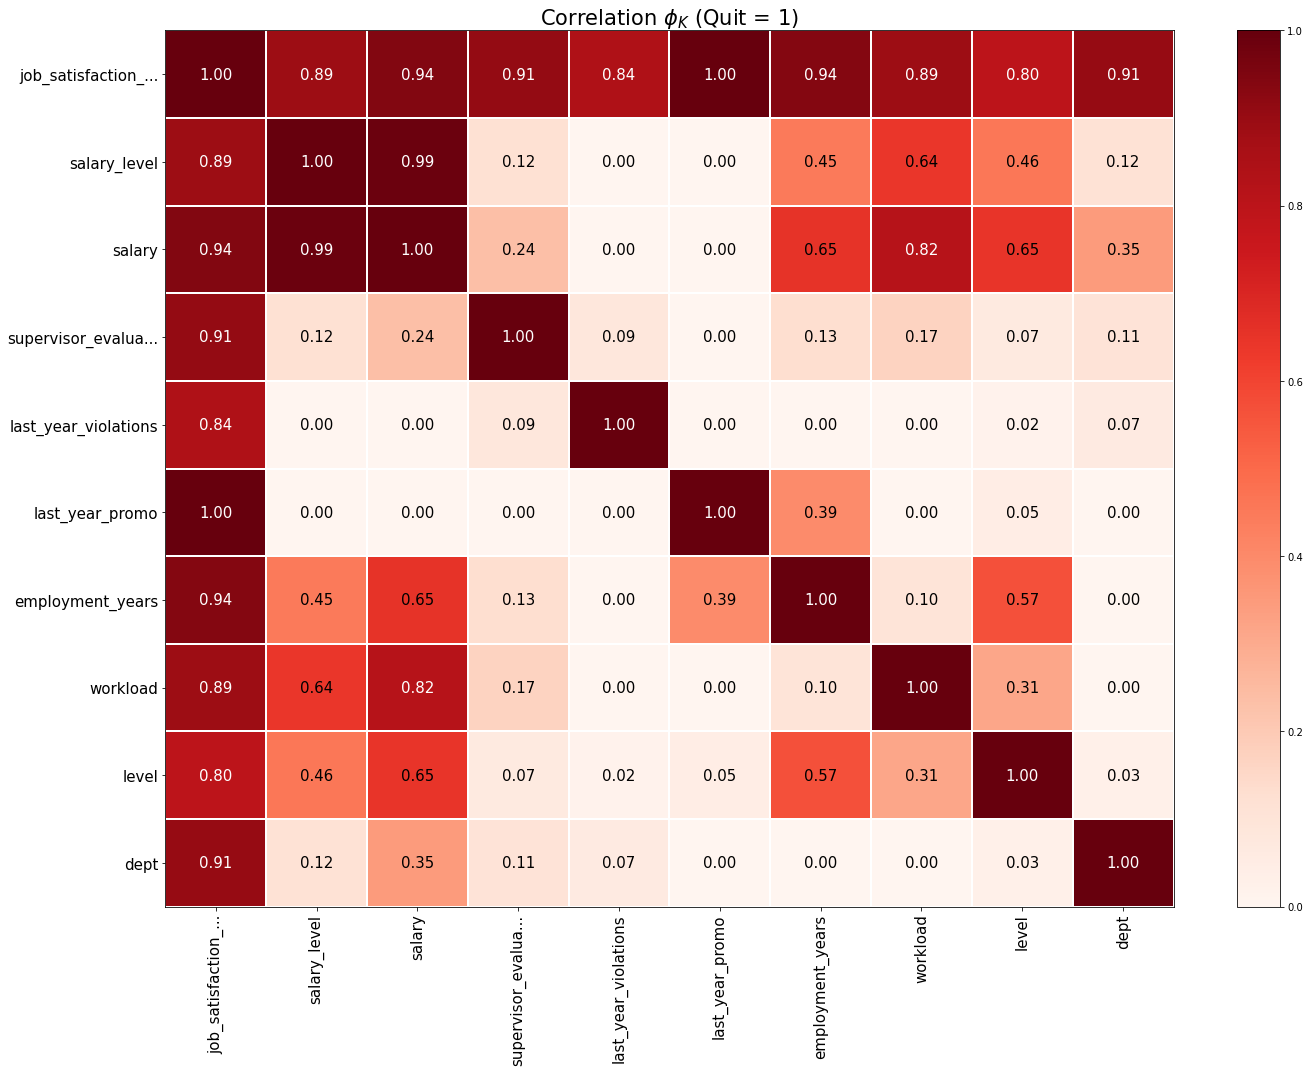

In [63]:
phik_overview_quit = phik_matrix(
    train_data_2[train_data_2['quit'] == 'yes'].drop(columns=['id']), 
    interval_cols=interval_cols
)


plot_correlation_matrix(
    phik_overview_quit.values,
    x_labels=phik_overview_quit.columns,
    y_labels=phik_overview_quit.index,
    vmin=0, vmax=1, color_map='Reds',
    title=r'Correlation $\phi_K$ (Quit = 1)',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

**Отдельно строим корреляцию для оставшихся (quit == 0)**

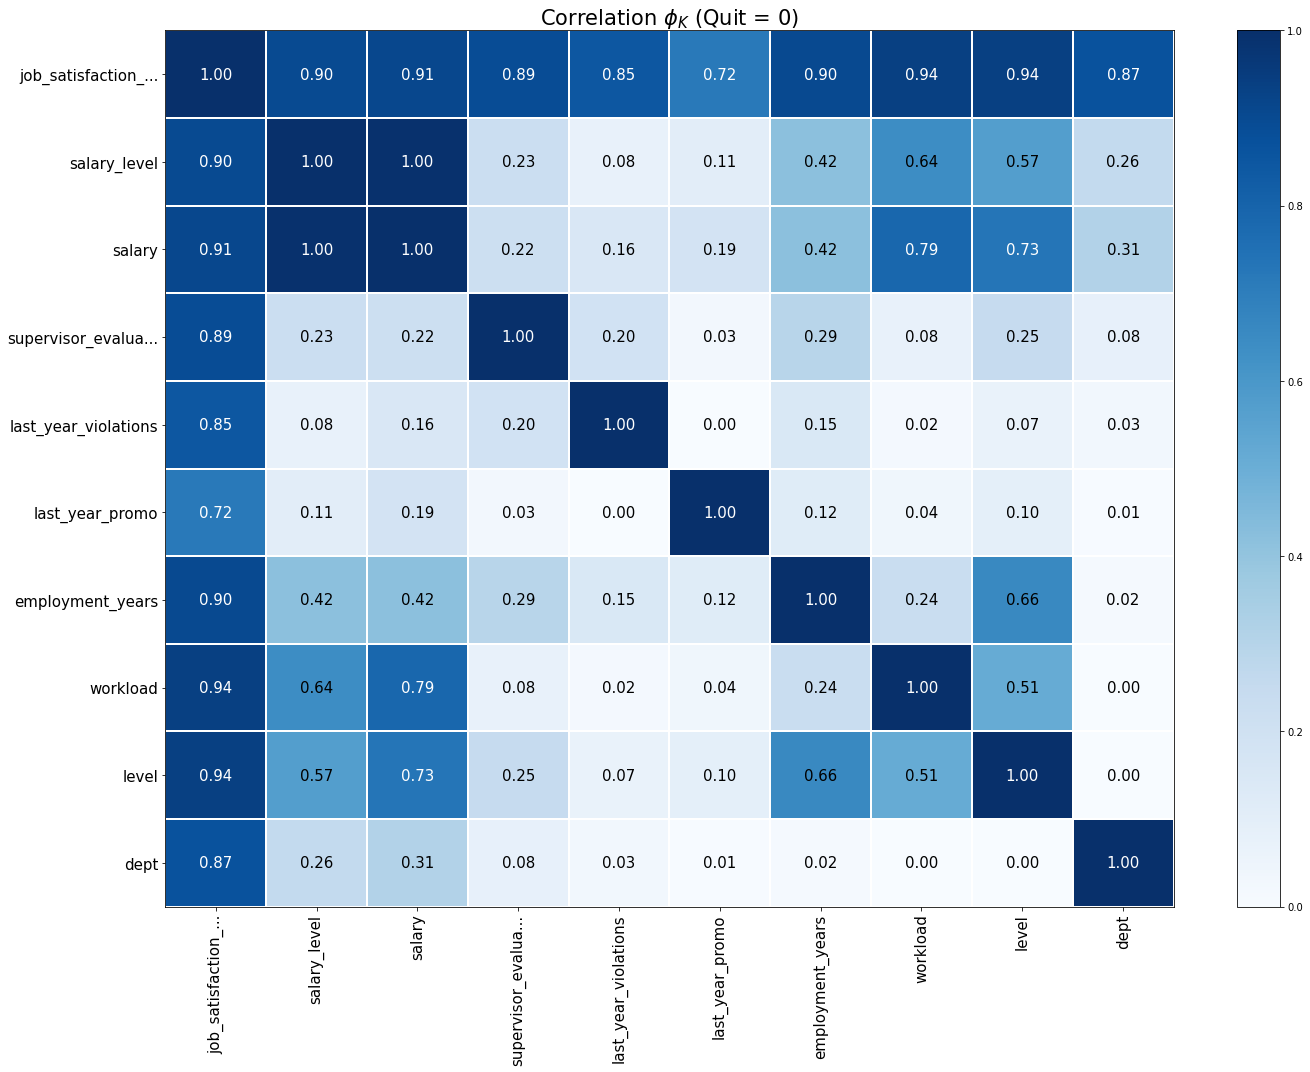

In [64]:
phik_overview_stay = phik_matrix(
    train_data_2[train_data_2['quit'] == 'no'].drop(columns=['id']), 
    interval_cols=interval_cols
)

plot_correlation_matrix(
    phik_overview_stay.values,
    x_labels=phik_overview_stay.columns,
    y_labels=phik_overview_stay.index,
    vmin=0, vmax=1, color_map='Blues',
    title=r'Correlation $\phi_K$ (Quit = 0)',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

По хитмапам видно, что примерно одни и те же признаки одинаково влияют на знаечние признака `qiut`

### Установка индекса

In [65]:
train_data_2 = train_data_2.set_index('id')
train_data_2.duplicated().sum()

1413

In [66]:
train_data_2 = train_data_2.drop_duplicates()
train_data_2.shape

(2587, 11)

### Разделение тренировочного датасета

In [67]:
X_train_2 = train_data_2.drop(['quit', 'salary_level'], axis=1)
y_train_2 = train_data_2['quit']

X_train_2.shape

(2587, 9)

### Разделение тестового датасета

In [68]:
test_2 = X_test_2.merge(y_test_2,on='id', how='left')

X_test_2 = test_2.drop(['id', 'quit'], axis=1)
y_test_2 = test_2['quit']

X_test_2.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate_pred
0,marketing,junior,medium,2,no,no,5,28800,0.866364
1,hr,junior,medium,1,no,no,4,30000,0.670417
2,sales,middle,low,5,no,no,4,19200,0.654000
3,sales,middle,low,6,no,no,4,19200,0.655000
4,hr,middle,medium,5,no,no,5,40800,0.832000


### Создание пайплайнов

In [69]:
ohe_columns_2 = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns_2 = ['level', 'workload']
num_columns_2 = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate_pred']

In [70]:
data_preprocessor_2 = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns_2),
        ('ord', ord_pipe, ord_columns_2),
        ('num', MinMaxScaler(), num_columns_2)
    ], 
    remainder='passthrough'
)

<a id="section12"></a> 
##  Обучение модели

### Обучение модели

In [71]:
pipeline_final = Pipeline([
    ('preprocessor', data_preprocessor_2),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,15),
        'models__max_features': range(2,15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
     
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [SVC(
            random_state=RANDOM_STATE,
            probability=True
        )],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'models__kernel': ['linear', 'rbf']
    }
    
       
]
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train_2, y_train_2)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pipeline(s...
                                                               'passthrough']},
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__kernel': ['linear', 'rbf'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

### Получение предсказаний и значение метрики

In [72]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                   

In [73]:
y_test_proba_2 = randomized_search.predict_proba(X_test_2)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_2, y_test_proba_2)}')

Метрика ROC-AUC на тестовой выборке: 0.9122994824077914


### Промежуточный вывод

По результатам обучения моделей, можно выделить следующие важные моменты:

Лучшая модель: DecisionTreeClassifier с параметрами:

 - max_depth=5
 - max_features=8
 - random_state=42
 
Метрика `ROC_AUC` при оубчении 0.90, на тестовой - 0.91

<a id="section13"></a> 
##  Выводы по задаче 2

**Этап предобработки данных и исследовательского анализа**

Явные и неявные дубликаты не обнаружены

В данных также были обнаружены выбросы, которые оказались реалистичными по своим значениям, поэтому было принято решение не удалять их.


Также в столбце `level` (уровень должности) была исправлена опечатка, заменив "senior" на правильное значение.

**На основе представленных диаграмм можно сделать следующие выводы:**

 - Отдел (dept): В некоторых отделах процент увольнений выше, чем в других. Возможно, это связано с условиями труда, уровнем стресса или корпоративной культурой.
 
 - Уровень должности (level): Более низкие должности (junior) имеют более высокий процент увольнений по сравнению с senior-уровнем, что может говорить о меньшей удовлетворенности или высокой текучести кадров среди младших сотрудников.
 
 - Уровень загруженности (workload): У сотрудников с высокой загруженностью доля увольнений выше, что может свидетельствовать о выгорании.
 
 - Прошлогоднее повышение (last_year_promo): Те, кто получил повышение, реже увольняются, что логично — повышение способствует удовлетворенности работой.
 
 - Нарушения трудового договора (last_year_violations): Сотрудники, у которых были нарушения, чаще увольняются, что может указывать на дисциплинарные проблемы или неудовлетворенность условиями работы.
 
 - Уровень зарплаты (salary_level): Более низкий уровень зарплаты коррелирует с более высоким процентом увольнений, тогда как сотрудники с высокой зарплатой остаются дольше.
 
 - Оценка руководителя (supervisor_evaluation): Сотрудники с низкой оценкой чаще увольняются, что может говорить о низкой мотивации или несоответствии ожиданиям.
 
 - Стаж работы (employment_years): В первые несколько лет процент увольнений выше, а затем он снижается. Возможно, это связано с адаптацией новых сотрудников.


Все выявленные связи логичны и объяснимы, утечек целевого признака не обнаружено.

**Проверка утверждения**

Для проверки утверждения выдвинуты гипотезы и использован `t-тест Стьюдента` → p-value = 6.16e-105.

Отвергаем H₀: Удовлетворённость работой значимо влияет на увольнение.

Вывод: Чем ниже удовлетворённость, тем выше вероятность ухода.

**Использование пайплайнов**

 - Для поиска наилучшей модели была проведена подготовка данных.
 - Рассматривались 4 модели: DecisionTreeClassifier(), SVC(), KNeighborsClassifier() и LogisticRegression().
 - Для DecisionTreeRegressor были подобраны гиперпараметры.
 - Для перебора моделей и гиперпараметров использовался метод RandomizedSearchCV.
 - В качестве метрики оценки использовалась метрика ROC_AUC.
 
***Результаты:*** Лучшая модель: DecisionTreeClassifier с параметрами:

   - max_depth=5 — ограничивает максимальную глубину дерева (предотвращает переобучение),
   - max_features=8 — максимальное количество признаков, которые могут быть рассмотрены при разделении узлов,
   - random_state=42 — параметр для воспроизводимости результатов.
   
   
**Метрика**

Метрика на тренировочной выборке: 0.90,

Метрика ROC_AUC на тестовых данных: 0.91.


<a id="section14"></a> 
## Общий вывод

**Задачи исследования**

 - Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.

 - Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.



**Предобработка данных и исследовательский анализ**
Данные в таблицах реалистичны и соответствуют описанию. Исправлены опечатки, обнаруженные пропущенные значения заменены на этапе работы с пайплайном.

**Корреляционный анализ**

Построены матрицы корреляции, мультиколлинеарности нет. Утечки целевого признака нет.

**Анализ уволившихся сотрудников**

Провели анализ данных по целевому признаку и вывели портрет уволившегося сотрудника: Специалист на позиции junior, отработавший в компании менее двух лет, с уровень загруженности - low и зарплатой менее 20к.

Построили график плотности распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников и убедились, что чем выше уровень удовлетворенности сотрудника, тем больше вероятность, что сотрудник не уволится. 

**Использование пайплайнов**

Для поиска лучшей модели для задачи 1:

 - была проведена подготовка данных
 - в качестве моделей рассматривались: DecisionTreeRegressor() и LinearRegression()
 - для модели DecisionTreeRegressor был подобраны гиперпараметры
 - для перебора моделей и параметров использовали метод RandomizedSearchCV
 - в качестве метрики оценки модели была определена метрика smape
 
Лучшая модель: `DecisionTreeRegressor` с параметрами:

 - max_depth=13
 - max_features=8
 - random_state=42
 

Преобразование и повторная оценка на объединенных данных: результат метрики SMAPE улучшился до 14.34


Для поиска лучшей модели задачи 2:

 - была проведена подготовка данных
 - в качестве моделей рассматривались: DecisionTreeClassifier(), KNeighborsClassifier(), LogisticRegression(), CVС()
 - для моделей были подобраны гиперпараметры
 - для перебора моделей и параметров использовали метод RandomizedSearchCV
 - в качестве метрики оценки модели была выбрана - ROC-AUC.

Лучшая модель: `DecisionTreeClassifier` с параметрами:

 - max_depth=5
 - max_features=8
 - random_state=42
 
Метрика ROC_AUC на тренировочной выборке 0.90, на тестовой - 0.91

**Предложения для бизнеса**

Для того, чтобы снизить количество увольнений в компании, можно предложить заказчику следующие рекомендации:

 - Разработать план карьерного роста (от junior - до middle - и до senior). Прописать четкие критерии перехода.
 - Ввести надбавки к зарплате в зависимости от стажа в компании.